In [4]:
import matplotlib.pyplot as plt

import scienceplots
import numpy as np

plt.style.use(["science", "notebook", "muted"])
plt.rcParams["text.usetex"] = False

from sklearn.model_selection import train_test_split

In [5]:
def gen_data(bounds, npts, method):
    assert method in ['random','uniform']
    if method == 'uniform':
        x_ = np.linspace(bounds[0][0], bounds[0][1], npts)
        y_ = np.linspace(bounds[1][0], bounds[1][1], npts)
        XX, YY = np.meshgrid(x_, y_)
        XX_r = XX.ravel()
        YY_r = YY.ravel()
        
        ZZ = np.sin(XX + YY)
        ZZ_r = ZZ.ravel()

        X, y = np.c_[XX_r, YY_r], ZZ_r
    elif method == 'random':
        x = np.random.uniform(bounds[0][0], bounds[0][1], npts)[:,np.newaxis]
        y = np.random.uniform(bounds[1][0], bounds[1][1], npts)[:,np.newaxis]
        z = np.sin(x+y)[:,0]
        X, y = np.c_[x, y], z
    else:
        raise ValueError(f"unknown {method = }")
    
    return X, y

In [6]:
# X, y = gen_data([(-7, 7), (-7, 7)], 10000, 'random')
X, y = gen_data([(-7, 7), (-7, 7)], 100, 'uniform')

In [7]:
mask = (X[:,0] > 1) & (X[:,0] < 3) & (X[:,1] > 1) & (X[:,1] < 3)
X = X[~mask]
y = y[~mask]

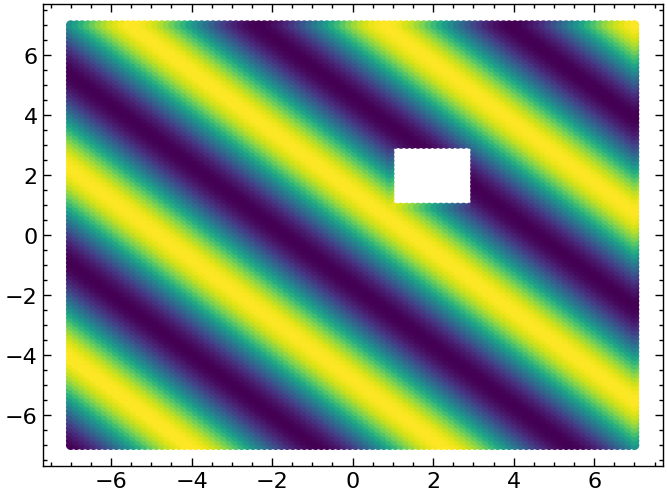

In [8]:
plt.scatter(X[:,0], X[:,1], c=y)

In [10]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

In [11]:
X_train.shape

(6862, 2)

In [12]:
X_test.shape

(2942, 2)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

In [14]:
gbr = GradientBoostingRegressor(loss='quantile', alpha=0.5, max_depth=10).fit(X_train, y_train)
yhat_gbr = gbr.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, yhat_gbr)

0.002718132229177151

In [43]:
hgbr = HistGradientBoostingRegressor(learning_rate=0.2, max_iter=400, loss='quantile', quantile=0.5).fit(X_train, y_train)
yhat_hgbr = hgbr.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, yhat_hgbr)

0.005271862414714928

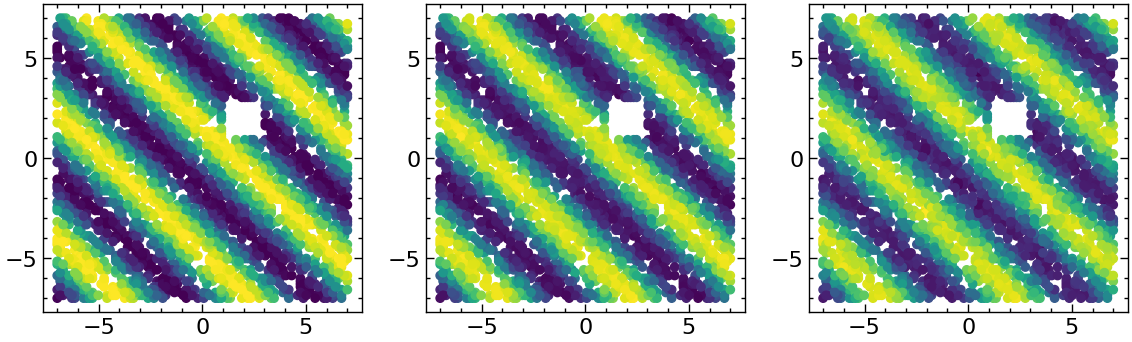

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
axes[0].scatter(X_test[:,0], X_test[:,1], c=y_test)
axes[1].scatter(X_test[:,0], X_test[:,1], c=yhat_gbr)
axes[2].scatter(X_test[:,0], X_test[:,1], c=yhat_hgbr)

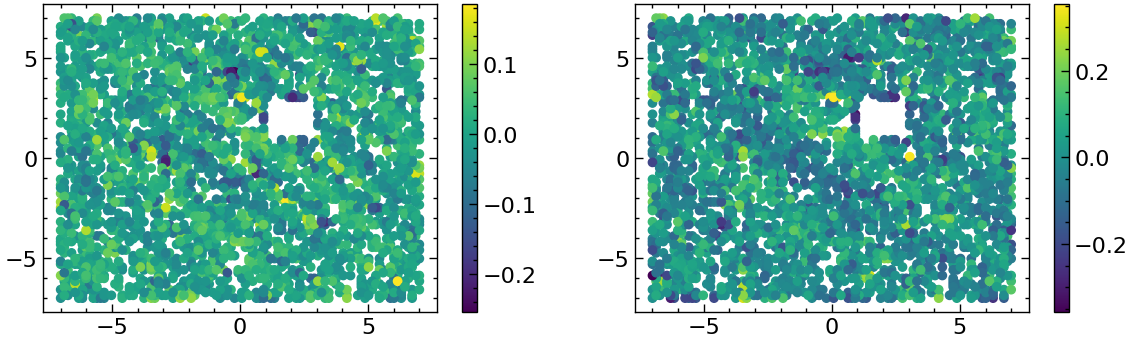

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
im1 = axes[0].scatter(X_test[:,0], X_test[:,1], c=y_test-yhat_gbr)
plt.colorbar(im1)
im2 = axes[1].scatter(X_test[:,0], X_test[:,1], c=y_test-yhat_hgbr)
plt.colorbar(im2)